In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
path='/content/drive/My Drive/dataset/Clothing Reviews.csv'
df=pd.read_csv(path)


In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.drop(["Clothing ID", "Title"], axis=1, inplace=True)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
len(df)

23486

In [ ]:
df.describe()

,Unnamed: 0,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,43.198544,4.196032,0.822362,2.535936
std,6779.968547,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
df['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [ ]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [ ]:
df['Recommended IND'].unique()

array([1, 0])

In [ ]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Values according to rating

In [ ]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

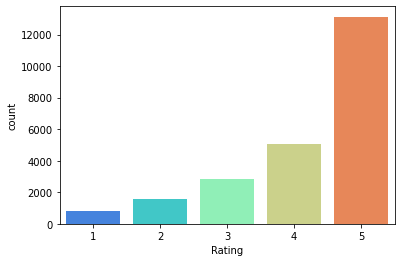

In [ ]:
sns.countplot(x='Rating', data=df, palette='rainbow')

13131 items are given 5 ratings.

Rating based on percentage. How to make into percentage

In [ ]:
df["Rating"].dtypes

dtype('int64')

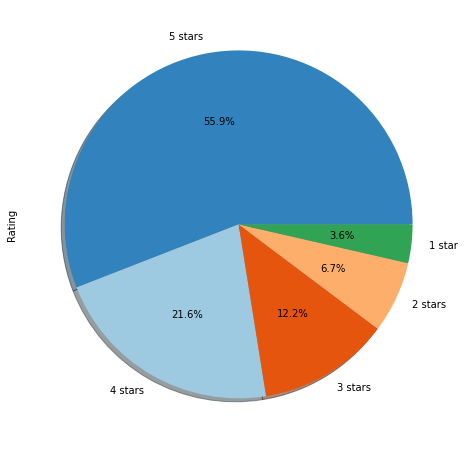

In [ ]:
plt.figure(figsize=(8,8))
labels = ["5 stars", "4 stars", "3 stars", "2 stars", "1 star"]
cmap = plt.get_cmap("tab20c")
df["Rating"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, labels=labels, colors = cmap(np.arange(5)*2)) #this kind of cmap can be used only if there are numeric values in the column

#  Suggestion Index. (1- Yes, 0-No)

In [ ]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

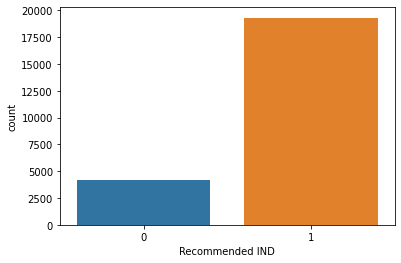

In [ ]:
sns.countplot(x="Recommended IND", data=df)

***Ratings based on Index***

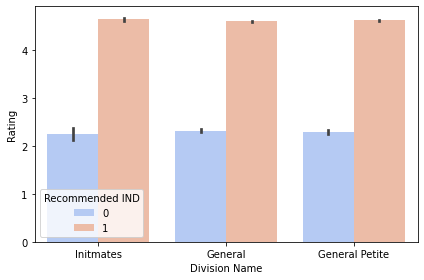

In [ ]:
sns.barplot(x="Division Name", y="Rating", data=df, palette='coolwarm',hue='Recommended IND')
plt.tight_layout()

# Items sold according to Department,Class and Division

In [ ]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [ ]:
df['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

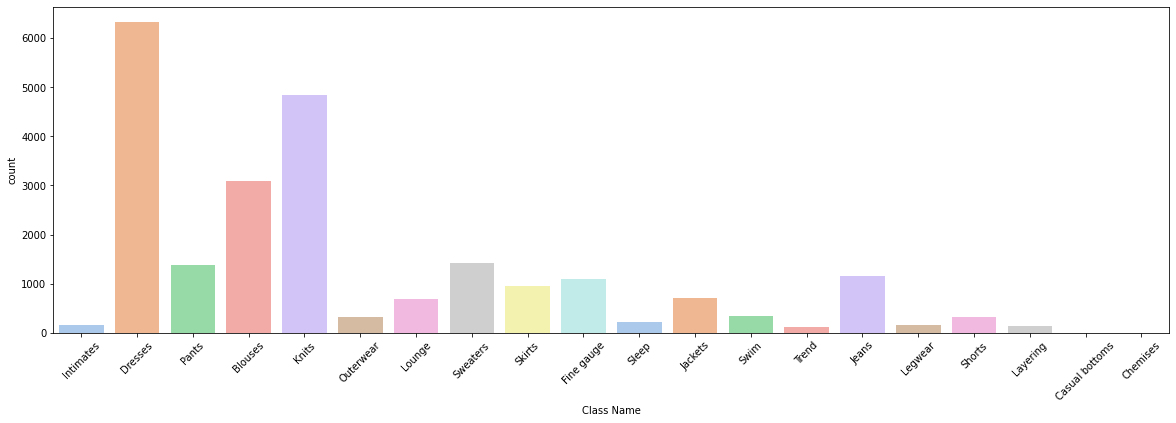

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df, palette='pastel')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

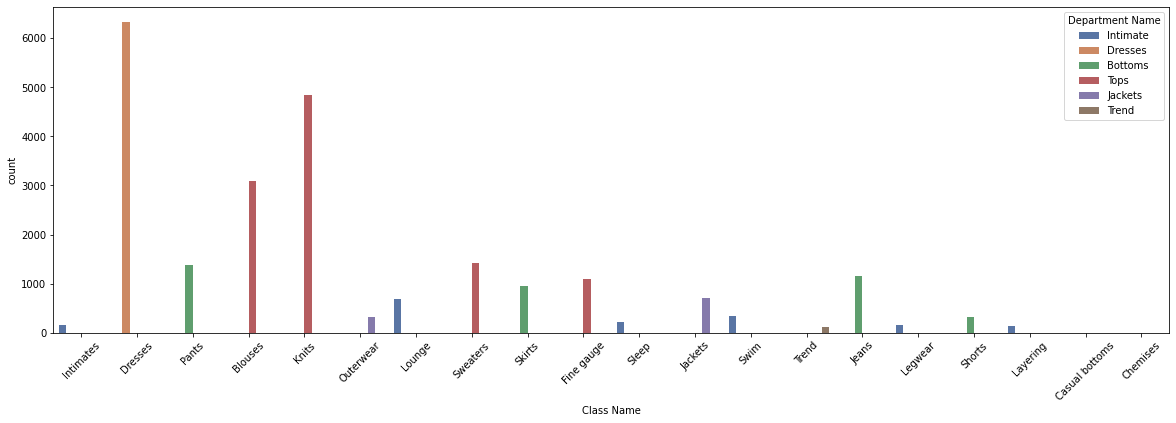

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df, palette='deep', hue='Department Name')
plt.xticks(rotation = 45)

Through the plot we can infer that a large number of Dresses fall on Dresses category, Blouses, knits, sweaters, fine gauge falls on tops category

***Departments in Each Division***

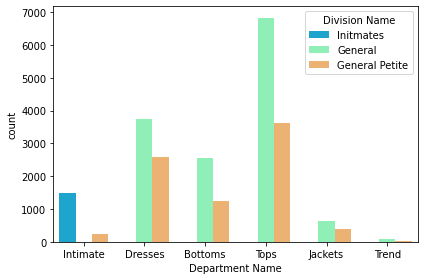

In [ ]:
sns.countplot(x="Department Name", data=df, palette='rainbow', hue='Division Name')
plt.tight_layout()

Dresses, bottoms, Tops comes in general division

# Department based on Rating

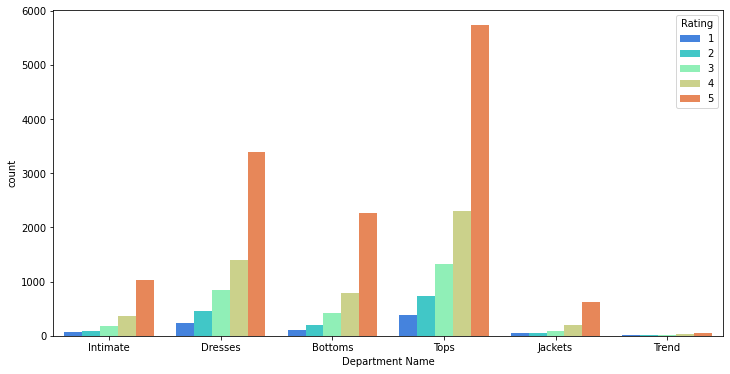

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='Department Name',data=df,hue='Rating',palette='rainbow')

Tops are on high rating of 5 and dress are followed by Tops

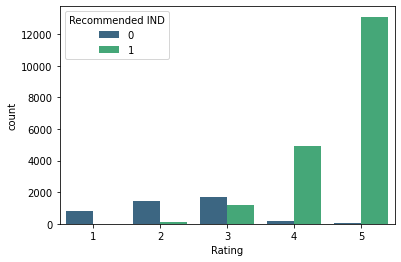

In [ ]:
sns.countplot(x='Rating',data=df,hue='Recommended IND',palette='viridis')

Rating based on Division Name

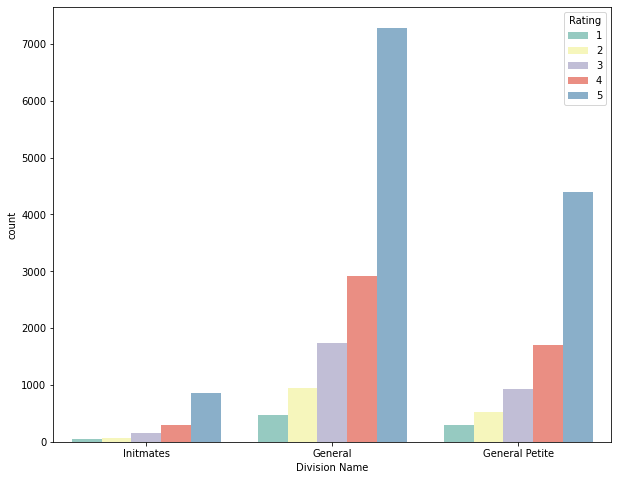

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Division Name',data=df,hue='Rating',palette='Set3')


# *Categoring Classes based on Ratings*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

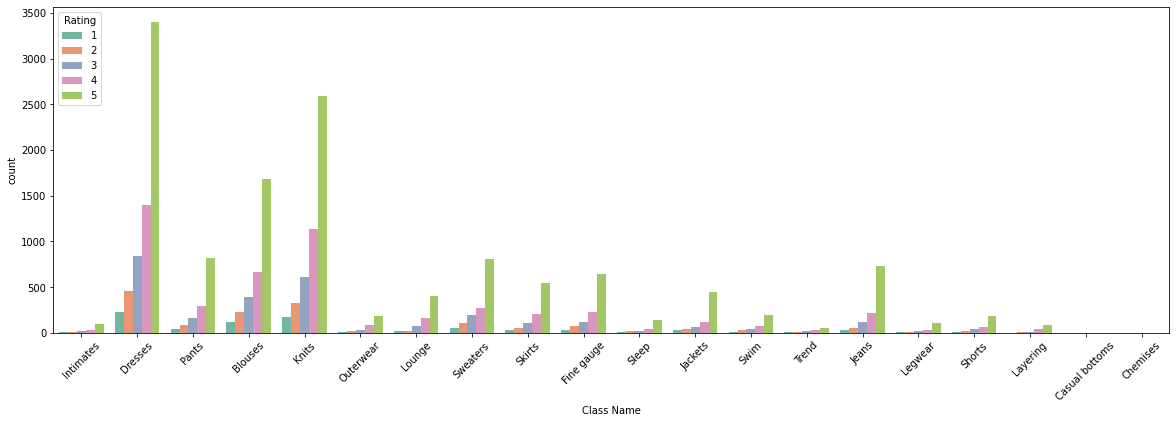

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df,hue='Rating',palette='Set2')
plt.xticks(rotation = 45)

# Age of Customers

In [ ]:
df['Age'].nunique()

77

In [ ]:
df['Age'].max()

99

In [ ]:
df['Age'].min()

18

In [ ]:
df['Age'].mean()

43.28037630846694

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


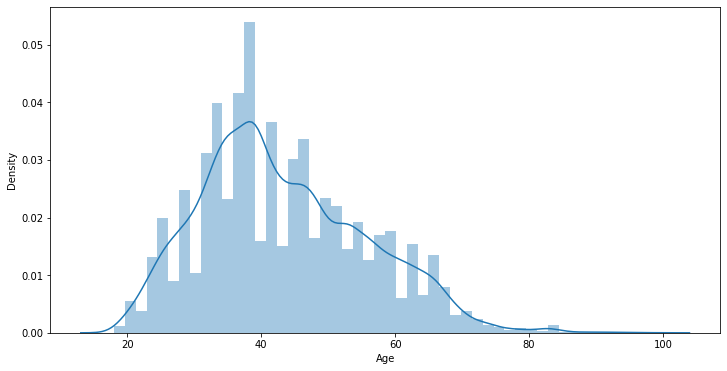

In [ ]:
plt.figure(figsize = (12,6))
sns.distplot(df['Age'],bins=50);

*Most of the customers are around age of 43*

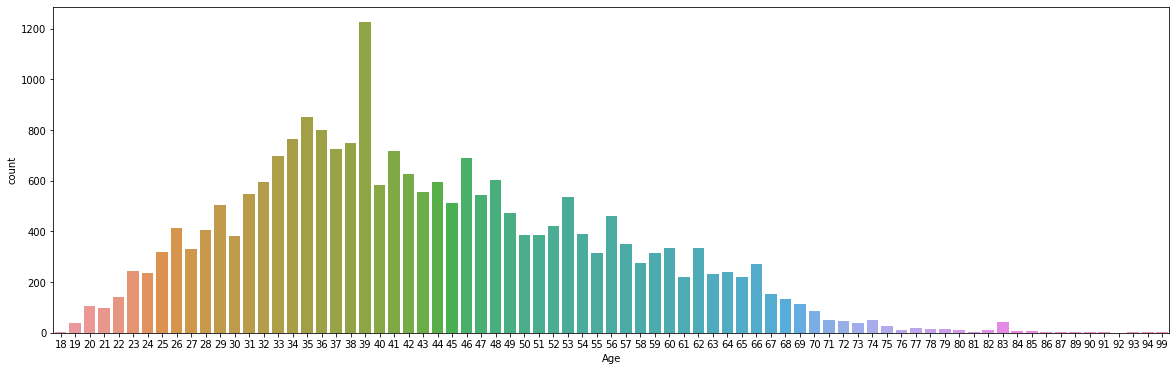

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Age', data = df)
plt.show()

In [ ]:
#for loop for ages

# ***Feature Engineering***

# Sentiment Analysis

In [ ]:
df['Review Text'].dtypes

dtype('O')

Removing the rows that has null values

In [ ]:
df = df[~df['Review Text'].isnull()]

In [ ]:
df['length']=df['Review Text'].apply(len)

In [ ]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


Length after removing the rows where Review Text is null

In [ ]:
len(df)

22641

Text(0.5, 1.0, 'message length')

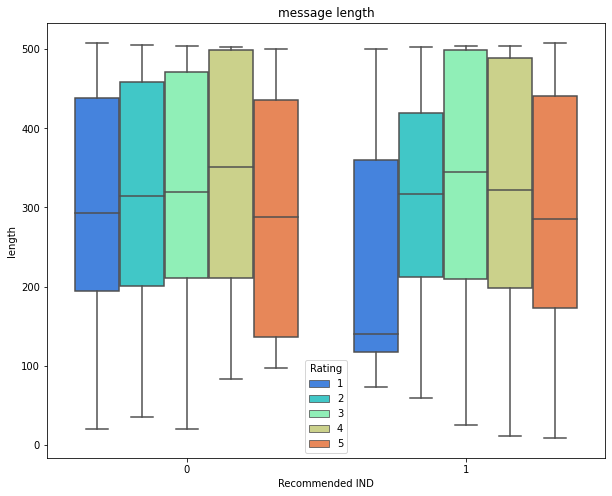

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Recommended IND',y='length',data=df,hue='Rating',palette='rainbow')
plt.title('message length')

*Message length and Rating*

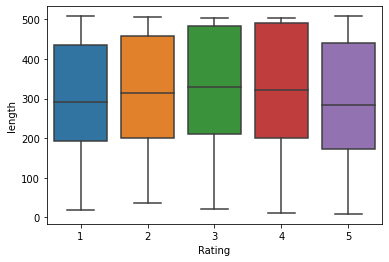

In [ ]:
sns.boxplot(x="Rating", y="length", data=df,)

**Text blob for polarity**

*Adding a column for polarity*

In [ ]:
from textblob import TextBlob


In [ ]:
df["Polarity"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

**Removing puntuations**

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review Text']=df['Review Text'].apply(lambda x: remove_punctuation(x))
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750


In [ ]:
df['Review Text'].head()

0    Absolutely wonderful  silky and sexy and comfo...
1    Love this dress  its sooo pretty  i happened t...
2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [ ]:
df.head(5)

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750


In [ ]:
df['Polarity'].min()

-0.9750000000000001

In [ ]:
import plotly.express as px
px.histogram(df, x='Polarity',color="Rating", opacity = 0.5)

*Dividing polarity in 3 ranges*

In [ ]:
def getAnalysis(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Positive'
   

In [ ]:
 df['TextBlob_Analysis']=df['Polarity'].apply(getAnalysis)


*Dataframe with new column of the polarity range*

In [ ]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive


In [ ]:
polarity_plot=df['TextBlob_Analysis'].value_counts()

In [ ]:
polarity_plot

Positive    21213
Negative     1333
Neutral        95
Name: TextBlob_Analysis, dtype: int64

In [ ]:
positive= 21213/len(df)*100
negative= 1333/len(df)*100
neutral= 95/len(df)*100

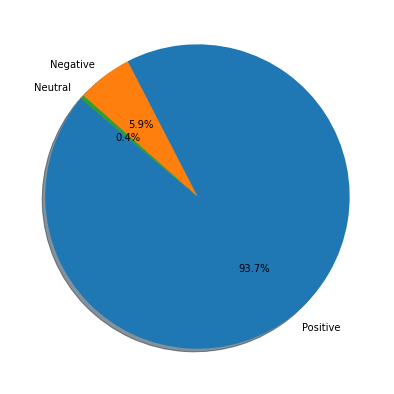

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
plt.figure(figsize=(12,7))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

In [ ]:
df['Polarity'].dtypes

dtype('float64')

['Positive', 'Negative', 'Neutral']


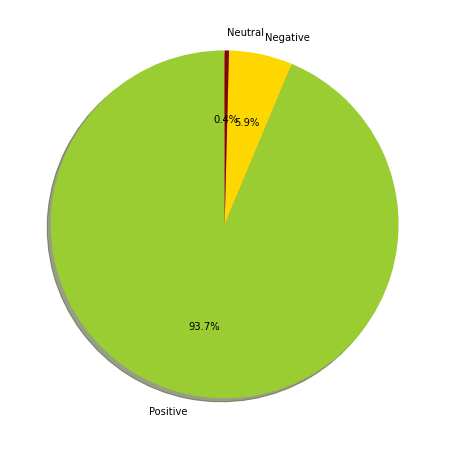

In [ ]:
plt.figure(figsize=(8,8))
topics=['Positive','Negative','Neutral']
percentage=[93.7,5.9,0.4]
sizes=percentage
labels=list(topics)
print(labels)
colors = ['yellowgreen',  'gold',  'darkred']
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.show()

In [ ]:
#review_type = {"Positive": 2, "Neutral": 1, "Negative": 0}
#df["Review Type"] = df["Review Type"].map(review_type)

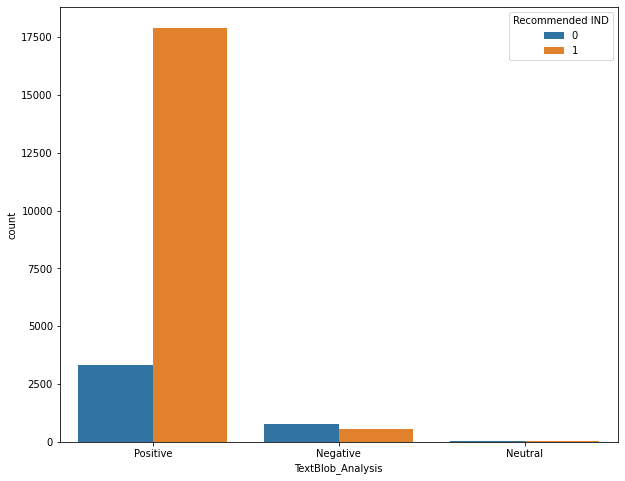

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='TextBlob_Analysis', data=df,hue='Recommended IND')

# Label Encoding of TextBlob Analysis column.(we need this column to perform sentiment analysis)

In [ ]:
 #Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Encoded_value']= label_encoder.fit_transform(df['TextBlob_Analysis'])
  
df['Encoded_value'].unique()

array([2, 0, 1])

In [ ]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive,2
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive,2


# Bag Of Words

In [ ]:
df['Polarity'].dtypes

dtype('float64')

In [ ]:
df['Polarity'] = df['Polarity'].astype(str)

In [ ]:
df['Review Text'] = df['Review Text'].astype(str)

In [ ]:
import numpy as np

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from tqdm import tqdm
df.index = np.arange(len(df))
corpus = []
for i in range(len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
vec = CountVectorizer().fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0)

In [ ]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)


#vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [ ]:
print(y)

[2 2 2 ... 2 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(X)

In [ ]:
messages_tfidf = tfidf_transformer.transform(X)
print(messages_tfidf.shape)

(22641, 1500)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['Encoded_value'])

In [ ]:
#single prediction
print('predicted:', spam_detect_model.predict(messages_tfidf)[9])
print('expected:', df.Encoded_value[9])

predicted: 2
expected: 2


In [ ]:
y_pred = spam_detect_model.predict(X_test)

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  91    0  203]
 [   1    0   20]
 [  49    0 4165]]


0.9397217928902627

In [ ]:
#classification report
from sklearn import metrics
y_pred = spam_detect_model.predict(X_test)
print("Classification report: \n" ,metrics.classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.31      0.42       294
           1       0.00      0.00      0.00        21
           2       0.95      0.99      0.97      4214

    accuracy                           0.94      4529
   macro avg       0.53      0.43      0.46      4529
weighted avg       0.93      0.94      0.93      4529



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



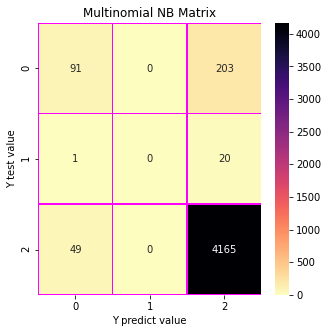

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

nb_cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.7, linecolor='magenta', fmt='g', ax=ax, cmap="magma_r")
plt.title('Multinomial NB Matrix')
plt.xlabel('Y predict value')
plt.ylabel('Y test value')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.9397217928902627


positive , negative words


In [ ]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Intimate,Intimates,53,0.6333333333333333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,Dresses,Dresses,303,0.31875000000000003,Positive,2
2,2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,Dresses,500,0.07639233954451345,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,Bottoms,Pants,124,0.5,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,Tops,Blouses,192,0.39375,Positive,2


In [ ]:
df_positive = df[df["TextBlob_Analysis"] == "Positive"]
df_negative = df[df["TextBlob_Analysis"] == "Negative"]

In [ ]:
df_positive.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Intimate,Intimates,53,0.6333333333333333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,Dresses,Dresses,303,0.31875000000000003,Positive,2
2,2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,Dresses,500,0.07639233954451345,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,Bottoms,Pants,124,0.5,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,Tops,Blouses,192,0.39375,Positive,2


In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(corpus)
top_ten = fdist.most_common(10)

In [ ]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))